In [95]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [96]:
sizes = [10, 10, 5]
probs = [[0.8, 0.2, 0.1], [0.2, 0.8, 0.3], [0.1, 0.3, 0.8]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
c = [0] * 10 + [1] * 10 + [2]*5

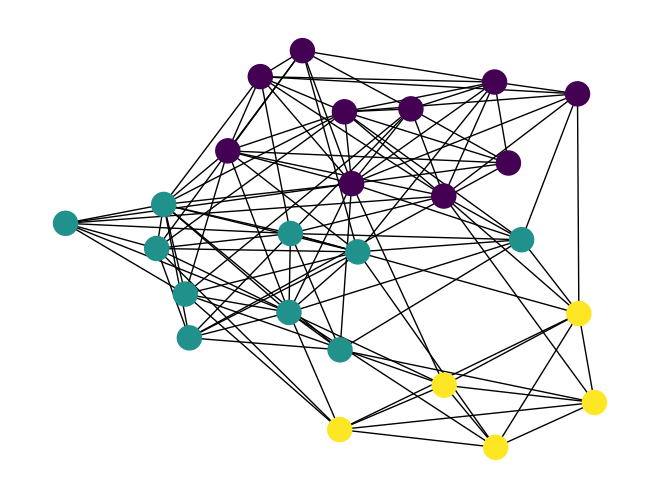

In [97]:
nx.draw(g,node_color=c)

In [98]:
nx.average_clustering(g)

0.4787778887778888

In [99]:
ac = np.zeros(25)
for i in range(1,25):
    sub = np.random.choice(25,i,replace=False)
    g1 = g.subgraph(sub)
    ac[i] = nx.average_clustering(g1)

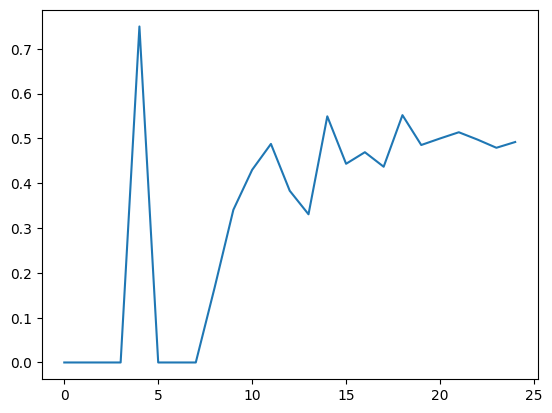

In [100]:
plt.plot(np.arange(25),ac)

In [101]:
ac

array([0.        , 0.        , 0.        , 0.        , 0.75      ,
       0.        , 0.        , 0.        , 0.16666667, 0.34074074,
       0.43      , 0.48787879, 0.38333333, 0.33076923, 0.54943311,
       0.44349206, 0.46934524, 0.4369281 , 0.55208834, 0.48542189,
       0.5       , 0.51389219, 0.4974301 , 0.47925697, 0.49209055])

In [102]:
N = 100
g = nx.barabasi_albert_graph(N,3)

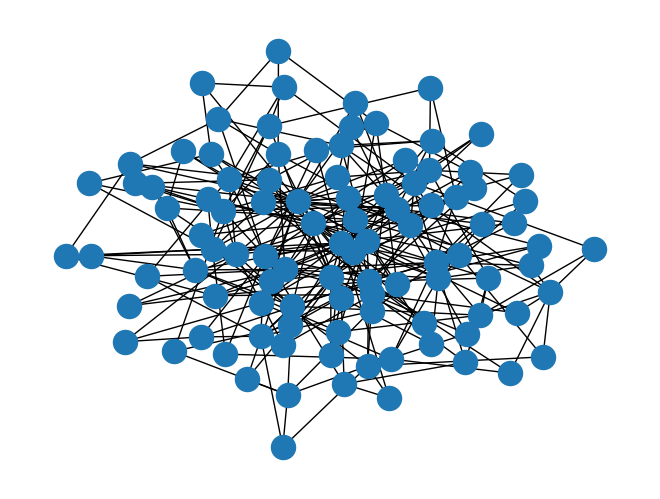

In [103]:
nx.draw(g)

In [104]:
nx.average_clustering(g)

0.11496097719832175

In [105]:
ac = np.zeros(N)
for i in range(1,N):
    sub = np.random.choice(N,i,replace=False)
    g1 = g.subgraph(sub)
    ac[i] = nx.average_clustering(g1)

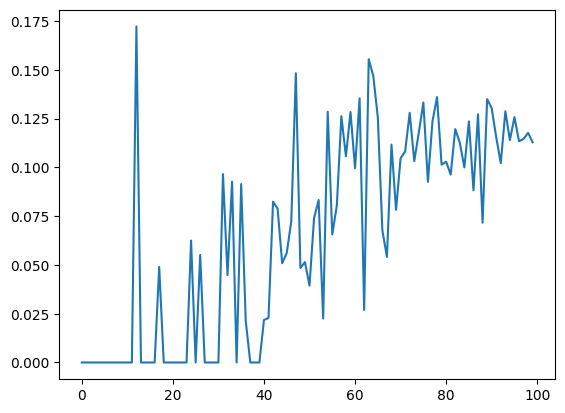

In [106]:
plt.plot(np.arange(N),ac)

In [107]:
ac

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17222222, 0.        , 0.        ,
       0.        , 0.        , 0.04901961, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0625    ,
       0.        , 0.05512821, 0.        , 0.        , 0.        ,
       0.        , 0.09656938, 0.04479167, 0.09264069, 0.        ,
       0.09142857, 0.0212963 , 0.        , 0.        , 0.        ,
       0.02174603, 0.02284166, 0.08244375, 0.07880801, 0.05087274,
       0.05611993, 0.07233672, 0.14823616, 0.04843224, 0.05146894,
       0.03944156, 0.07392624, 0.08324592, 0.0225413 , 0.12849665,
       0.06560934, 0.08045199, 0.12620756, 0.10567144, 0.12835665,
       0.09954607, 0.13541709, 0.02688172, 0.15540438, 0.14693614,
       0.12561732, 0.06774049, 0.0540501 , 0.11166149, 0.0782377 ,
       0.10469789, 0.10816855, 0.12797866, 0.1031926 , 0.11786

In [108]:
N = 100
sample = 100
ac = np.zeros(N)
for _ in range(sample):
    g = nx.barabasi_albert_graph(N,3)
    for i in range(1,N):
        sub = np.random.choice(N,i,replace=False)
        g1 = g.subgraph(sub)
        ac[i] += nx.average_clustering(g1)
ac /= sample

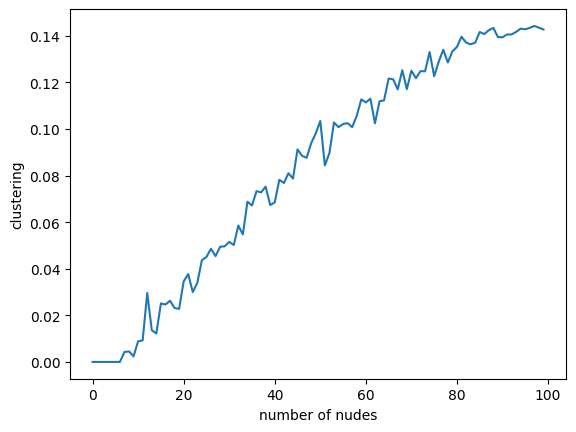

In [109]:
plt.plot(np.arange(N),ac)
plt.xlabel("number of nudes")
plt.ylabel("clustering")
plt.savefig("Sample_BA_clustering.pdf")
plt.show()


In [110]:
N = 100
sample = 100
ac = np.zeros(N)
for _ in range(sample):
    sizes = [40, 40, 20]
    probs = [[0.8, 0.2, 0.1], [0.2, 0.8, 0.3], [0.1, 0.3, 0.8]]
    g = nx.stochastic_block_model(sizes, probs, seed=0)
    for i in range(1,N):
        sub = np.random.choice(N,i,replace=False)
        g1 = g.subgraph(sub)
        ac[i] += nx.average_clustering(g1)
ac /= sample

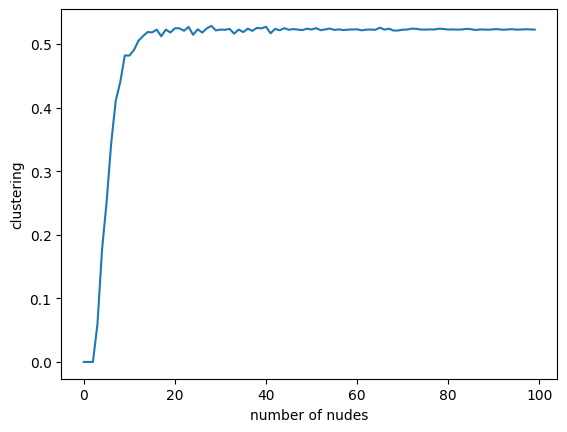

In [111]:
plt.plot(np.arange(N),ac)
plt.xlabel("number of nudes")
plt.ylabel("clustering")
plt.savefig("Sample_SBM_clustering.pdf")
plt.show()


## Original SBM

In [112]:
N = 60
M = 20

In [113]:
sizes = [30, 20, 10]
probs = [[0.8, 0.1, 0.05], [0.1, 0.8, 0.1], [0.05, 0.1, 0.8]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
c = []
for i,s in enumerate(sizes):
    c += s*[i]
c = np.array(c)

In [114]:
pos=nx.spring_layout(g)

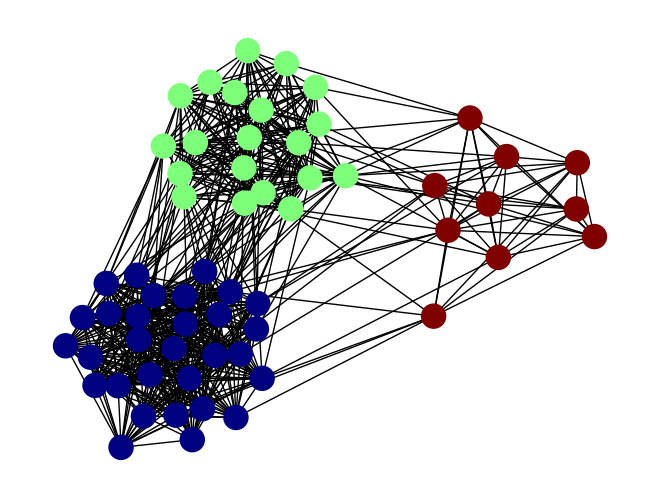

In [115]:
nx.draw(g,node_color=c,cmap='jet',pos=pos)

## Node select 30%

In [116]:
node_s = np.random.choice(N,M,replace=False)
node_s.sort()

In [117]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

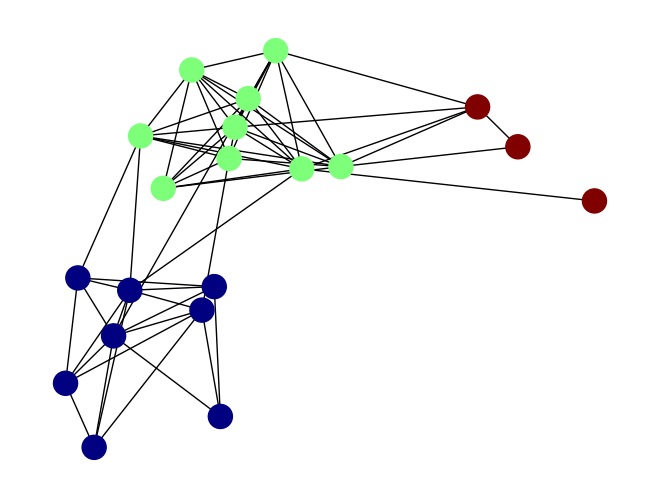

In [118]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Random walk 30%

In [119]:
i = np.random.randint(N)
node_s = set([i])
while len(node_s) < M:
    neighs = list(g.neighbors(i))
    i = np.random.choice(neighs,1)[0]
    node_s.add(i)
node_s = np.array(list(node_s))
node_s.sort()

In [120]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

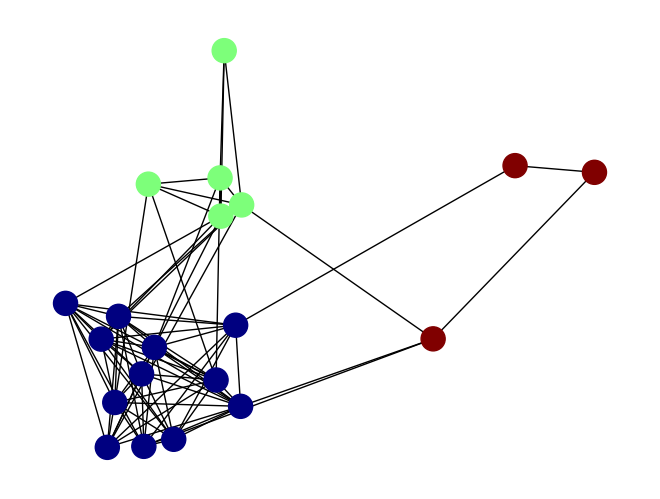

In [121]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Link select: link 30%

In [122]:
le = list(g.edges())
node_s = set()
edges = []
nne = len(le) / 3
while len(edges) < nne:
    i = np.random.choice(len(le),1)[0]
    j = le.pop(i)
    edges.append(j)
    node_s.add(j[0])
    node_s.add(j[1])
node_s = np.array(list(node_s))
node_s.sort()


In [123]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

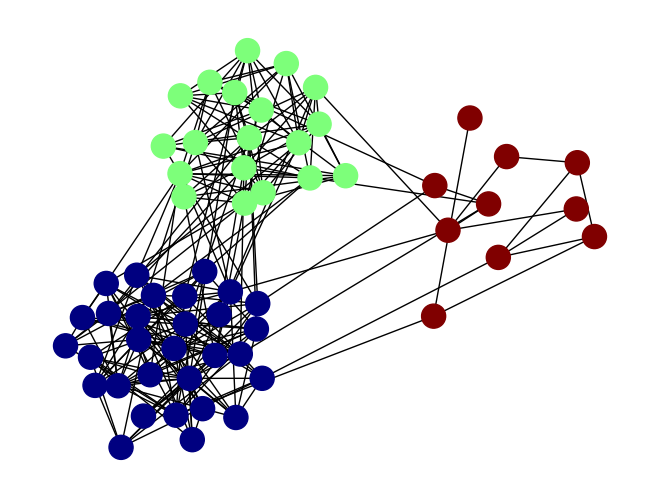

In [124]:
nx.draw(g.edge_subgraph(edges),node_color=c[node_s],cmap='jet',pos=pos2)

## Link select: node 30%

In [125]:
le = list(g.edges())
node_s = set()
edges = []
while len(node_s) < M:
    i = np.random.choice(len(le),1)[0]
    j = le.pop(i)
    edges.append(j)
    node_s.add(j[0])
    node_s.add(j[1])
node_s = np.array(list(node_s))
node_s.sort()


In [126]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

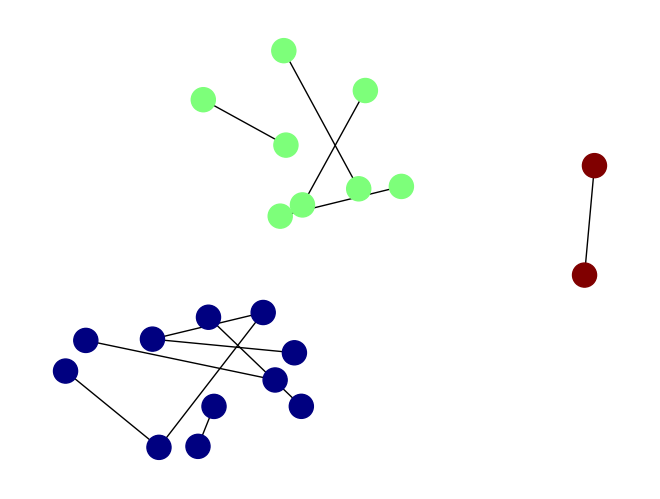

In [127]:
nx.draw(g.edge_subgraph(edges),node_color=c[node_s],cmap='jet',pos=pos2)

## link select: node 30% induced subgraph

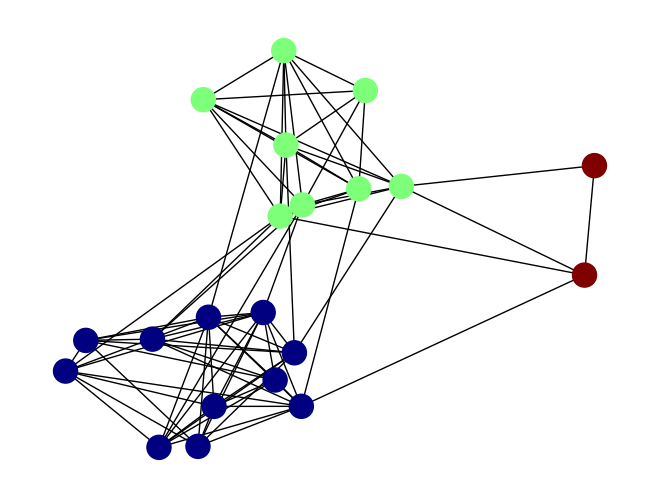

In [128]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Task
Reproduce the figures on slides 38 and 40 of the lecture slides!

 * Create an Erdős-Rényi network
 * Assign an affinity to each node (use at lest three different distributions of your choice)
 * Keep the links with probability proportional to the minimum of the affinities of the two nodes
 * Plot the degree distribution and the assortativity curve

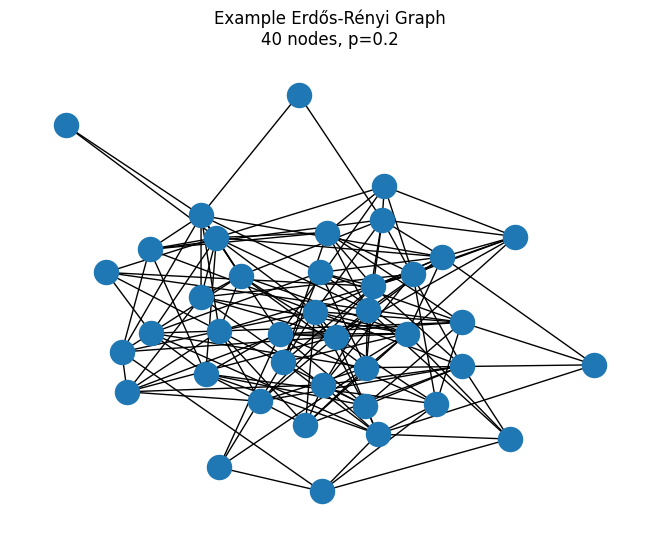

In [137]:
# Parameters for the experiment
n_graphs = 1000
n_nodes = 40
p_edge = 0.2

# Create one example ER graph for visualization
er = nx.erdos_renyi_graph(n_nodes, p_edge, seed=0)
nx.draw(er)
plt.title(f"Example Erdős-Rényi Graph\n{n_nodes} nodes, p={p_edge}")
plt.show()

In [138]:
# Define helper functions
def set_affinity_uniform(g):
    """Assign uniform [0,1] affinity to nodes"""
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.uniform(0, 1)
    return g

def set_affinity_normal(g):
    """Assign normal distribution affinity to nodes"""
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.normal(0, 1)
    return g

def set_affinity_power_law(g):
    """Assign power law affinity to nodes"""
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.power(1)
    return g

def filter_edges_by_affinity(g):
    """Keep edges with probability = min(affinity_u, affinity_v)"""
    g_filtered = g.copy()
    edges_to_remove = []
    
    for u, v in g.edges():
        min_affinity = min(g.nodes[u]['affinity'], g.nodes[v]['affinity'])
        # Remove edge with probability (1 - min_affinity)
        if np.random.uniform(0, 1) > min_affinity:
            edges_to_remove.append((u, v))
    
    g_filtered.remove_edges_from(edges_to_remove)
    return g_filtered

def calculate_assortativity_data(g):
    """Calculate node affinity vs average neighbor affinity"""
    node_affinities = []
    avg_neighbor_affinities = []
    
    for node in g.nodes():
        neighbors = list(g.neighbors(node))
        if len(neighbors) > 0:  # Only include nodes with neighbors
            node_affinity = g.nodes[node]['affinity']
            avg_neighbor_affinity = np.mean([g.nodes[n]['affinity'] for n in neighbors])
            
            node_affinities.append(node_affinity)
            avg_neighbor_affinities.append(avg_neighbor_affinity)
    
    return np.array(node_affinities), np.array(avg_neighbor_affinities)

print("Helper functions defined successfully")


Helper functions defined successfully


In [139]:
# Run experiment on multiple ER graphs and collect data
print(f"Running experiment on {n_graphs} different ER graphs...")

# Storage for aggregated results
all_degrees_uniform = []
all_degrees_normal = []
all_degrees_power = []

all_uniform_aff = []
all_uniform_neighbor_aff = []
all_normal_aff = []
all_normal_neighbor_aff = []
all_power_aff = []
all_power_neighbor_aff = []

# Run experiment n_graphs times
for i in range(n_graphs):
    # Create a new ER graph
    er_graph = nx.erdos_renyi_graph(n_nodes, p_edge)
    
    # Create separate copies with different affinity distributions
    er_uniform = set_affinity_uniform(er_graph.copy())
    er_normal = set_affinity_normal(er_graph.copy())
    er_power_law = set_affinity_power_law(er_graph.copy())
    
    # Filter edges based on affinities
    er_uniform_filtered = filter_edges_by_affinity(er_uniform)
    er_normal_filtered = filter_edges_by_affinity(er_normal)
    er_power_law_filtered = filter_edges_by_affinity(er_power_law)
    
    # Collect degree distributions
    degrees_uniform = [deg for node, deg in er_uniform_filtered.degree()]
    degrees_normal = [deg for node, deg in er_normal_filtered.degree()]
    degrees_power = [deg for node, deg in er_power_law_filtered.degree()]
    
    all_degrees_uniform.extend(degrees_uniform)
    all_degrees_normal.extend(degrees_normal)
    all_degrees_power.extend(degrees_power)
    
    # Collect assortativity data
    uniform_aff, uniform_neighbor_aff = calculate_assortativity_data(er_uniform_filtered)
    normal_aff, normal_neighbor_aff = calculate_assortativity_data(er_normal_filtered)
    power_aff, power_neighbor_aff = calculate_assortativity_data(er_power_law_filtered)
    
    all_uniform_aff.extend(uniform_aff)
    all_uniform_neighbor_aff.extend(uniform_neighbor_aff)
    all_normal_aff.extend(normal_aff)
    all_normal_neighbor_aff.extend(normal_neighbor_aff)
    all_power_aff.extend(power_aff)
    all_power_neighbor_aff.extend(power_neighbor_aff)
    
    if (i + 1) % 5 == 0:
        print(f"  Completed {i + 1}/{n_graphs} graphs")

# Convert to numpy arrays
all_uniform_aff = np.array(all_uniform_aff)
all_uniform_neighbor_aff = np.array(all_uniform_neighbor_aff)
all_normal_aff = np.array(all_normal_aff)
all_normal_neighbor_aff = np.array(all_normal_neighbor_aff)
all_power_aff = np.array(all_power_aff)
all_power_neighbor_aff = np.array(all_power_neighbor_aff)

print(f"\nExperiment complete!")
print(f"Total data points collected:")
print(f"  Uniform: {len(all_uniform_aff)} nodes")
print(f"  Normal: {len(all_normal_aff)} nodes")
print(f"  Power law: {len(all_power_aff)} nodes")


Running experiment on 1000 different ER graphs...
  Completed 5/1000 graphs
  Completed 10/1000 graphs
  Completed 15/1000 graphs
  Completed 20/1000 graphs
  Completed 25/1000 graphs
  Completed 30/1000 graphs
  Completed 35/1000 graphs
  Completed 40/1000 graphs
  Completed 45/1000 graphs
  Completed 50/1000 graphs
  Completed 55/1000 graphs
  Completed 60/1000 graphs
  Completed 65/1000 graphs
  Completed 70/1000 graphs
  Completed 75/1000 graphs
  Completed 80/1000 graphs
  Completed 85/1000 graphs
  Completed 90/1000 graphs
  Completed 95/1000 graphs
  Completed 100/1000 graphs
  Completed 105/1000 graphs
  Completed 110/1000 graphs
  Completed 115/1000 graphs
  Completed 120/1000 graphs
  Completed 125/1000 graphs
  Completed 130/1000 graphs
  Completed 135/1000 graphs
  Completed 140/1000 graphs
  Completed 145/1000 graphs
  Completed 150/1000 graphs
  Completed 155/1000 graphs
  Completed 160/1000 graphs
  Completed 165/1000 graphs
  Completed 170/1000 graphs
  Completed 175/10

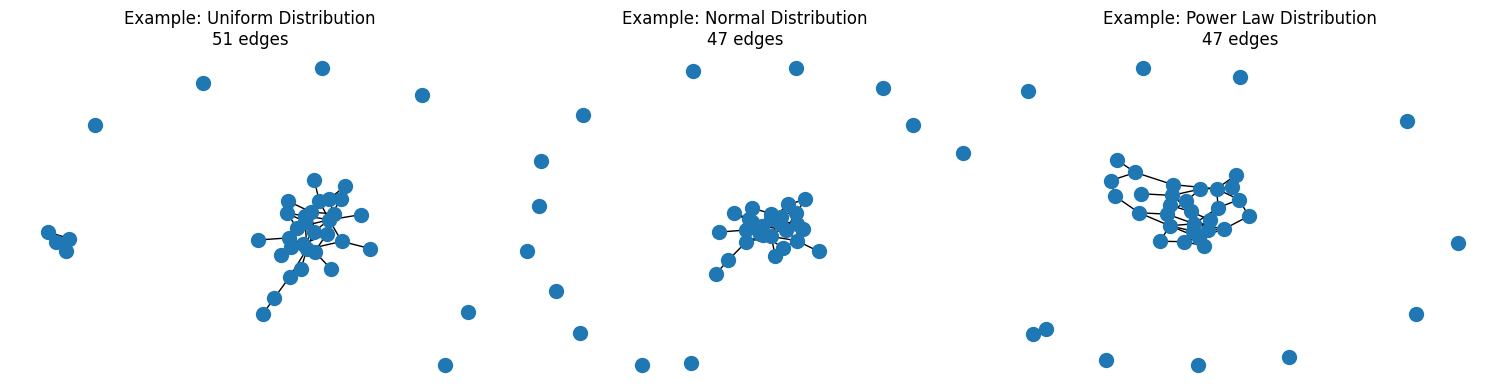

In [140]:
# Visualize one example of the filtered graphs (from last iteration)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

nx.draw(er_uniform_filtered, ax=axes[0], node_size=100)
axes[0].set_title(f'Example: Uniform Distribution\n{er_uniform_filtered.number_of_edges()} edges')

nx.draw(er_normal_filtered, ax=axes[1], node_size=100)
axes[1].set_title(f'Example: Normal Distribution\n{er_normal_filtered.number_of_edges()} edges')

nx.draw(er_power_law_filtered, ax=axes[2], node_size=100)
axes[2].set_title(f'Example: Power Law Distribution\n{er_power_law_filtered.number_of_edges()} edges')

plt.tight_layout()
plt.show()

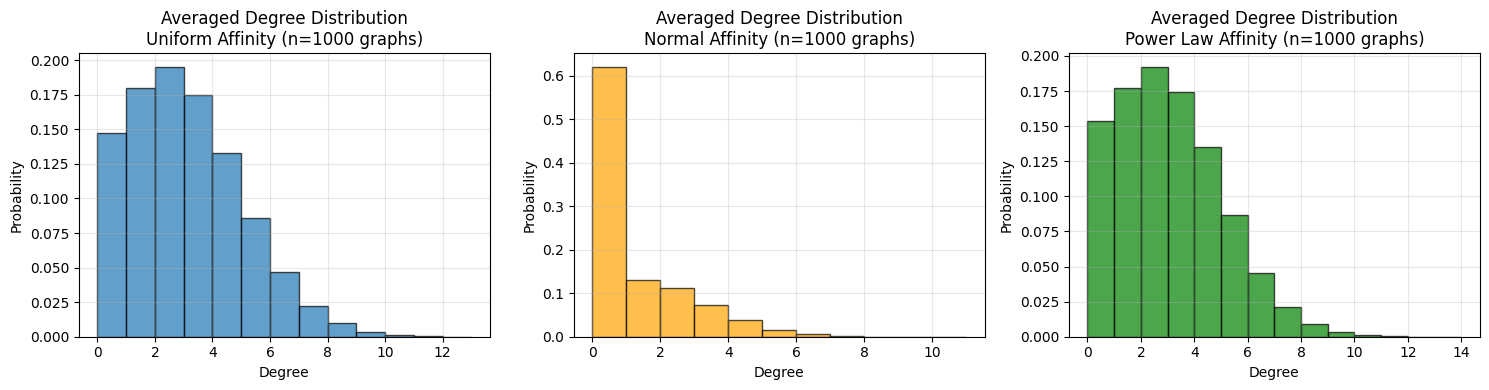

In [141]:
# Plot averaged degree distributions across all graphs
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Uniform distribution
max_deg = max(all_degrees_uniform) if all_degrees_uniform else 0
axes[0].hist(all_degrees_uniform, bins=range(max_deg+2), alpha=0.7, edgecolor='black', density=True)
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title(f'Averaged Degree Distribution\nUniform Affinity (n={n_graphs} graphs)')
axes[0].grid(True, alpha=0.3)

# Normal distribution
max_deg = max(all_degrees_normal) if all_degrees_normal else 0
axes[1].hist(all_degrees_normal, bins=range(max_deg+2), alpha=0.7, edgecolor='black', color='orange', density=True)
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title(f'Averaged Degree Distribution\nNormal Affinity (n={n_graphs} graphs)')
axes[1].grid(True, alpha=0.3)

# Power law distribution
max_deg = max(all_degrees_power) if all_degrees_power else 0
axes[2].hist(all_degrees_power, bins=range(max_deg+2), alpha=0.7, edgecolor='black', color='green', density=True)
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('Probability')
axes[2].set_title(f'Averaged Degree Distribution\nPower Law Affinity (n={n_graphs} graphs)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [142]:
# Create binned averages for smoother assortativity curves
def bin_assortativity_data(node_aff, neighbor_aff, n_bins=20):
    """Bin the assortativity data and compute averages"""
    # Sort by node affinity
    sorted_indices = np.argsort(node_aff)
    sorted_node_aff = node_aff[sorted_indices]
    sorted_neighbor_aff = neighbor_aff[sorted_indices]
    
    # Create bins
    bin_size = len(node_aff) // n_bins
    binned_node_aff = []
    binned_neighbor_aff = []
    binned_std = []
    
    for i in range(n_bins):
        start = i * bin_size
        end = start + bin_size if i < n_bins - 1 else len(node_aff)
        
        if end > start:
            binned_node_aff.append(np.mean(sorted_node_aff[start:end]))
            binned_neighbor_aff.append(np.mean(sorted_neighbor_aff[start:end]))
            binned_std.append(np.std(sorted_neighbor_aff[start:end]))
    
    return np.array(binned_node_aff), np.array(binned_neighbor_aff), np.array(binned_std)

# Bin the data for each distribution
uniform_binned = bin_assortativity_data(all_uniform_aff, all_uniform_neighbor_aff)
normal_binned = bin_assortativity_data(all_normal_aff, all_normal_neighbor_aff)
power_binned = bin_assortativity_data(all_power_aff, all_power_neighbor_aff)

print("Assortativity data binned for smoother visualization")


Assortativity data binned for smoother visualization


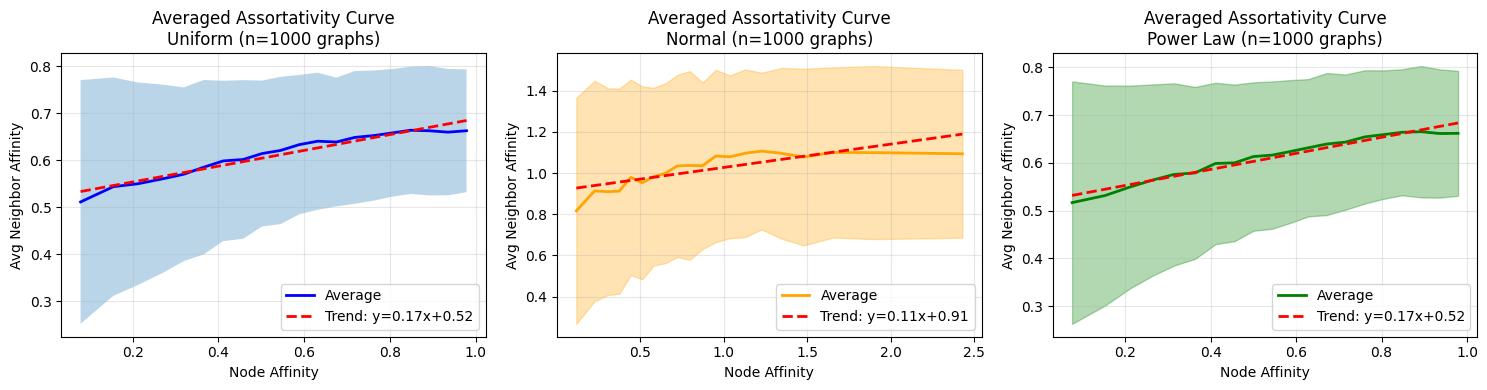

In [143]:
# Plot averaged assortativity curves with error bands
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Uniform distribution
uniform_node, uniform_neighbor, uniform_std = uniform_binned
axes[0].plot(uniform_node, uniform_neighbor, 'b-', linewidth=2, label='Average')
axes[0].fill_between(uniform_node, uniform_neighbor - uniform_std, uniform_neighbor + uniform_std, alpha=0.3)
# Add trend line
z = np.polyfit(all_uniform_aff, all_uniform_neighbor_aff, 1)
p = np.poly1d(z)
x_range = np.linspace(uniform_node.min(), uniform_node.max(), 100)
axes[0].plot(x_range, p(x_range), "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[0].set_xlabel('Node Affinity')
axes[0].set_ylabel('Avg Neighbor Affinity')
axes[0].set_title(f'Averaged Assortativity Curve\nUniform (n={n_graphs} graphs)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Normal distribution
normal_node, normal_neighbor, normal_std = normal_binned
axes[1].plot(normal_node, normal_neighbor, 'orange', linewidth=2, label='Average')
axes[1].fill_between(normal_node, normal_neighbor - normal_std, normal_neighbor + normal_std, alpha=0.3, color='orange')
# Add trend line
z = np.polyfit(all_normal_aff, all_normal_neighbor_aff, 1)
p = np.poly1d(z)
x_range = np.linspace(normal_node.min(), normal_node.max(), 100)
axes[1].plot(x_range, p(x_range), "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[1].set_xlabel('Node Affinity')
axes[1].set_ylabel('Avg Neighbor Affinity')
axes[1].set_title(f'Averaged Assortativity Curve\nNormal (n={n_graphs} graphs)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Power law distribution
power_node, power_neighbor, power_std = power_binned
axes[2].plot(power_node, power_neighbor, 'green', linewidth=2, label='Average')
axes[2].fill_between(power_node, power_neighbor - power_std, power_neighbor + power_std, alpha=0.3, color='green')
# Add trend line
z = np.polyfit(all_power_aff, all_power_neighbor_aff, 1)
p = np.poly1d(z)
x_range = np.linspace(power_node.min(), power_node.max(), 100)
axes[2].plot(x_range, p(x_range), "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[2].set_xlabel('Node Affinity')
axes[2].set_ylabel('Avg Neighbor Affinity')
axes[2].set_title(f'Averaged Assortativity Curve\nPower Law (n={n_graphs} graphs)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [144]:
# Calculate correlation coefficients (assortativity measures) from aggregated data
from scipy.stats import pearsonr

uniform_corr, uniform_pval = pearsonr(all_uniform_aff, all_uniform_neighbor_aff)
normal_corr, normal_pval = pearsonr(all_normal_aff, all_normal_neighbor_aff)
power_corr, power_pval = pearsonr(all_power_aff, all_power_neighbor_aff)

print(f"Assortativity Correlation Coefficients (averaged over {n_graphs} ER graphs):")
print(f"Uniform:   r = {uniform_corr:.4f} (p = {uniform_pval:.4e})")
print(f"Normal:    r = {normal_corr:.4f} (p = {normal_pval:.4e})")
print(f"Power Law: r = {power_corr:.4f} (p = {power_pval:.4e})")
print("\nPositive correlation indicates assortative mixing (similar affinities connect)")
print(f"\nTotal data points:")
print(f"  Uniform:   {len(all_uniform_aff)} nodes")
print(f"  Normal:    {len(all_normal_aff)} nodes")
print(f"  Power Law: {len(all_power_aff)} nodes")


Assortativity Correlation Coefficients (averaged over 1000 ER graphs):
Uniform:   r = 0.2525 (p = 0.0000e+00)
Normal:    r = 0.1475 (p = 2.0833e-74)
Power Law: r = 0.2547 (p = 0.0000e+00)

Positive correlation indicates assortative mixing (similar affinities connect)

Total data points:
  Uniform:   34104 nodes
  Normal:    15144 nodes
  Power Law: 33861 nodes
